# Problem statement

365 Data Science is an online learning platform specializing in data science courses. Students learn by watching video content, then evaluate their knowledge by taking quizzes, practice exams, course exams, and career track exams. The exams can be attempted more than once.

The following task has you develop a machine learning model to predict whether a Free Plan user would convert to a paid subscriber or not.

Think of the features that could help determine the outcome. Share your results by supporting them with relevant metrics, a confusion matrix, or another industry-standard method for model evaluation. Note that this classification problem deals with a heavily imbalanced dataset.

### Domain expert knowledge :

You can evaluate the metrics for a fixed period. Our experience has shown that students generally convert within 1 or 2 weeks after entering the platform. Therefore, it is reasonable to confine the features to within several days after registration—for example, minutes watched N days after registration.

In [1]:
# importing required libraries and frameworks
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = None
from datetime import datetime, timedelta
%matplotlib inline

Data is spread over several different files. We need to explore the data provided in all these files and compile useful data into single dataframe which can further be vectorized to create a machine learning model with it.

In [2]:
files = [f for f in os.listdir('./365_database') ] #if os.path.isfile(f)]
for f in files:
    print(f)
    
path = "./365_database/"
course_info = pd.read_csv(path+"365_course_info.csv")
course_ratings = pd.read_csv(path+"365_course_ratings.csv")
exam_info = pd.read_csv(path+"365_exam_info.csv")
quiz_info = pd.read_csv(path+"365_quiz_info.csv")
student_engagement = pd.read_csv(path+"365_student_engagement.csv")
student_exams = pd.read_csv(path + "365_student_exams.csv")
student_hub_questions = pd.read_csv(path+"365_student_hub_questions.csv")
student_info = pd.read_csv(path+"365_student_info.csv")
student_learning = pd.read_csv(path+"365_student_learning.csv")
student_purchases = pd.read_csv(path+"365_student_purchases.csv")
student_quizzes = pd.read_csv(path+"365_student_quizzes.csv")

365_course_info.csv
365_course_ratings.csv
365_exam_info.csv
365_quiz_info.csv
365_student_engagement.csv
365_student_exams.csv
365_student_hub_questions.csv
365_student_info.csv
365_student_learning.csv
365_student_purchases.csv
365_student_quizzes.csv


In [3]:
# Collecting all the dataframe names and corresponding columns in a list
dataframe_names, dataframe_features = [],[]

**1.1 course_info dataframe contains course_id and corresponding course_title**

In [4]:
# print data type of columns and non-null value count
print(course_info.info())

# append the dataframe name and column names
dataframe_names.append('course_info')
dataframe_features.append(list(course_info.columns))

# print first 3 rows of dataframe
course_info.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   course_id     46 non-null     int64 
 1   course_title  46 non-null     object
dtypes: int64(1), object(1)
memory usage: 864.0+ bytes
None


,course_id,course_title
0,2,Introduction to Tableau
1,3,"The Complete Data Visualization Course with Python, R, Tableau, and Excel"
2,4,Introduction to R Programming


**1.2 course_ratings dataframe contains course_id, student_id, course_rating and date_rated**

In [5]:
print(course_ratings.info())

dataframe_names.append('course_ratings')
dataframe_features.append(list(course_ratings.columns))

course_ratings.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   course_id      2500 non-null   int64 
 1   student_id     2500 non-null   int64 
 2   course_rating  2500 non-null   int64 
 3   date_rated     2500 non-null   object
dtypes: int64(3), object(1)
memory usage: 78.2+ KB
None


,course_id,student_id,course_rating,date_rated
0,14,258956,5,2022-07-06
1,7,259019,5,2022-08-30
2,23,259019,4,2022-08-30


**1.3 exam_info dataframe contains exam_id, exam_category and exam_duration**

In [6]:
print(exam_info.info())

dataframe_names.append('exam_info')
dataframe_features.append(list(exam_info.columns))

exam_info.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   exam_id        156 non-null    int64
 1   exam_category  156 non-null    int64
 2   exam_duration  156 non-null    int64
dtypes: int64(3)
memory usage: 3.8 KB
None


,exam_id,exam_category,exam_duration
0,118,2,14
1,119,2,14
2,120,1,26


**1.4 quiz_info dataframe contains quiz_id, question_id, answer_id and answer_correct**

In [7]:
print(quiz_info.info())

dataframe_names.append('quiz_info')
dataframe_features.append(list(quiz_info.columns))

quiz_info.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   quiz_id         4741 non-null   int64 
 1   question_id     4741 non-null   int64 
 2   answer_id       4741 non-null   int64 
 3   answer_correct  4741 non-null   object
dtypes: int64(3), object(1)
memory usage: 148.3+ KB
None


,quiz_id,question_id,answer_id,answer_correct
0,1,1,1,n
1,1,1,2,y
2,1,1,3,n


**1.5 student_engagement contains engagement_id, student_id, engagement_quizzes, engagement_exams, engagement_lessons, date_engaged**

In [8]:
print(student_engagement.info())

dataframe_names.append('student_engagement')
dataframe_features.append(list(student_engagement.columns))

student_engagement.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65371 entries, 0 to 65370
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   engagement_id       65371 non-null  int64 
 1   student_id          65371 non-null  int64 
 2   engagement_quizzes  65371 non-null  int64 
 3   engagement_exams    65371 non-null  int64 
 4   engagement_lessons  65371 non-null  int64 
 5   date_engaged        65371 non-null  object
dtypes: int64(5), object(1)
memory usage: 3.0+ MB
None


,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
0,1,274999,1,1,1,2022-05-27
1,3,274501,0,0,1,2022-05-27
2,4,272842,1,1,1,2022-05-27


**1.6 student_exams contains exam_attempt_id, student_id, exam_id, exam_result, exam_completion_time, date_exam_completed**

In [9]:
print(student_exams.info())

dataframe_names.append('student_exams')
dataframe_features.append(list(student_exams.columns))

student_exams.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34030 entries, 0 to 34029
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exam_attempt_id       34030 non-null  int64  
 1   student_id            34030 non-null  int64  
 2   exam_id               34030 non-null  int64  
 3   exam_result           34030 non-null  int64  
 4   exam_completion_time  34030 non-null  float64
 5   date_exam_completed   34030 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 1.6+ MB
None


,exam_attempt_id,student_id,exam_id,exam_result,exam_completion_time,date_exam_completed
0,173311,258803,475,83,5.17,2022-01-01
1,173332,258815,380,0,10.02,2022-01-01
2,173333,258815,380,67,7.93,2022-01-01


**1.7 student_hub_questions contains hug_question_id, student_id, date_question_asked**

In [10]:
print(student_hub_questions.info())

dataframe_names.append('student_hub_questions')
dataframe_features.append(list(student_hub_questions.columns))

student_hub_questions.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   hub_question_id      827 non-null    int64 
 1   student_id           827 non-null    int64 
 2   date_question_asked  827 non-null    object
dtypes: int64(2), object(1)
memory usage: 19.5+ KB
None


,hub_question_id,student_id,date_question_asked
0,7619,258803,2022-01-03
1,7630,258803,2022-01-04
2,7662,259342,2022-01-05


**1.8 student_info contains student_id, student_country and date_registered**

In [11]:
print(student_info.info())

dataframe_names.append('student_info')
dataframe_features.append(list(student_info.columns))

student_info.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35230 entries, 0 to 35229
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   student_id       35230 non-null  int64 
 1   student_country  35217 non-null  object
 2   date_registered  35230 non-null  object
dtypes: int64(1), object(2)
memory usage: 825.8+ KB
None


,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01


**1.9 student_learning dataframe contains student_id, course_id, minutes_watched and date_watched**

In [12]:
print(student_learning.info())

dataframe_names.append('student_learning')
dataframe_features.append(list(student_learning.columns))

student_learning.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       64535 non-null  int64  
 1   course_id        64535 non-null  int64  
 2   minutes_watched  64535 non-null  float64
 3   date_watched     64535 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ MB
None


,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03


**1.10 student_purchases dataframe contains purchase_id, student_id, purchase_type, date_purchased**

In [13]:
print(student_purchases.info())

dataframe_names.append('student_purchases')
dataframe_features.append(list(student_purchases.columns))

student_purchases.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   purchase_id     3041 non-null   int64 
 1   student_id      3041 non-null   int64 
 2   purchase_type   3041 non-null   object
 3   date_purchased  3041 non-null   object
dtypes: int64(2), object(2)
memory usage: 95.2+ KB
None


,purchase_id,student_id,purchase_type,date_purchased
0,15781,258800,Annual,2022-01-01
1,15786,258803,Annual,2022-01-01
2,15808,258862,Annual,2022-01-01


**1.11 student_quizzes dataframe contain student_id, quiz_id, question_id and answer_id**

In [14]:
print(student_quizzes.info())

dataframe_names.append('student_quizzes')
dataframe_features.append(list(student_quizzes.columns))

student_quizzes.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147029 entries, 0 to 147028
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   student_id   147029 non-null  int64  
 1   quiz_id      147029 non-null  int64  
 2   question_id  147029 non-null  int64  
 3   answer_id    146800 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 4.5 MB
None


,student_id,quiz_id,question_id,answer_id
0,258803,537,796,3139.0
1,258803,159,793,3127.0
2,258803,159,794,3132.0


Now, that all the data set files are parsed, let's store the names of all data frames and their corresponding columns together. 

In [15]:
dataset_info = pd.DataFrame({'dataframe_names' : dataframe_names, 'dataframe_features': dataframe_features})
dataset_info

,dataframe_names,dataframe_features
0,course_info,"[course_id, course_title]"
1,course_ratings,"[course_id, student_id, course_rating, date_rated]"
2,exam_info,"[exam_id, exam_category, exam_duration]"
3,quiz_info,"[quiz_id, question_id, answer_id, answer_correct]"
4,student_engagement,"[engagement_id, student_id, engagement_quizzes, engagement_exams, engagement_lessons, date_engaged]"
5,student_exams,"[exam_attempt_id, student_id, exam_id, exam_result, exam_completion_time, date_exam_completed]"
6,student_hub_questions,"[hub_question_id, student_id, date_question_asked]"
7,student_info,"[student_id, student_country, date_registered]"
8,student_learning,"[student_id, course_id, minutes_watched, date_watched]"
9,student_purchases,"[purchase_id, student_id, purchase_type, date_purchased]"


Our problem statement is to predict whether student will purchase the subscription or not. So, the student is the primary independent feature and the purchase made/not made is the target feature. Our task here is to create features based on student's engagement with the platform for the first 15 days and based on it, determine whether the student is likely to make purchase or not. 

In [16]:
len(np.unique(student_info.student_id)), len(np.unique(student_purchases.student_id))

(35230, 2135)

So there are total of 35230 students out of which only 2135 students seem to have purchased the course. 

In [17]:
# combine the student info dataframe with the student purchases dataframe
df = student_info.merge(student_purchases, on=['student_id'], how='left')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36136 entries, 0 to 36135
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       36136 non-null  int64  
 1   student_country  36123 non-null  object 
 2   date_registered  36136 non-null  object 
 3   purchase_id      3041 non-null   float64
 4   purchase_type    3041 non-null   object 
 5   date_purchased   3041 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.9+ MB


,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased
0,258798,IN,2022-01-01,NaN,NaN,NaN
1,258799,CO,2022-01-01,NaN,NaN,NaN
2,258800,CA,2022-01-01,15781.0,Annual,2022-01-01
3,258801,IN,2022-01-01,NaN,NaN,NaN
4,258802,US,2022-01-01,NaN,NaN,NaN


Convert the date feature which is of string object datatype into 'datetime' datatype

In [18]:
df.date_registered = pd.to_datetime(df.date_registered)
df.date_purchased = pd.to_datetime(df.date_purchased)

Let us plot a graph to know how much time a user takes to buy subscription

<AxesSubplot:>

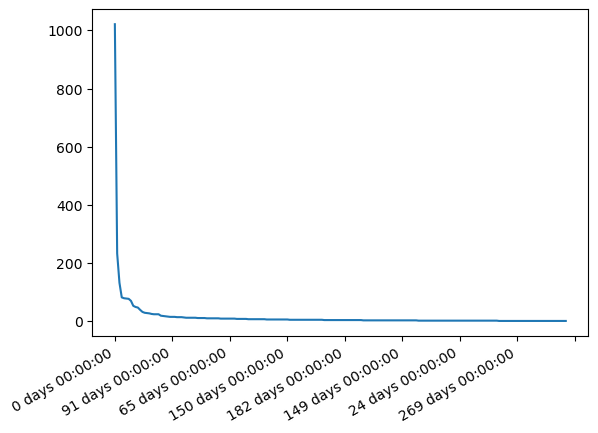

In [19]:
(df.date_purchased - df.date_registered).value_counts().plot()

In [20]:
df['days_taken'] = df.date_purchased - df.date_registered

In [21]:
df.head()

,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased,days_taken
0,258798,IN,2022-01-01,NaN,NaN,NaT,NaT
1,258799,CO,2022-01-01,NaN,NaN,NaT,NaT
2,258800,CA,2022-01-01,15781.0,Annual,2022-01-01,0 days
3,258801,IN,2022-01-01,NaN,NaN,NaT,NaT
4,258802,US,2022-01-01,NaN,NaN,NaT,NaT


Majority of the users seem to have bought the subscription on the first day itself i.e. the day user registered. Our problem statement however is about the users who are currently free users and we need to predict whether they are likely to buy subscription in near future. So, we are going to consider only those users who have NOT purchased the subscription on the same day they registered. One of the limitations of this data is that, we don't have the timestamp of exactly when the user signed up and when the user bought the subscription, otherwise we would have analysed the user activity between these two time segments. 

In [22]:
df = df[df['days_taken'] != '0 days']

There will also be students who have bought the subscription twice. But as our problem statement is concerned only about customer acquisition i.e. when the user buys the subscription for the very first time, we will ignore the records where the customer is buying the subscription again and restrict ourselves to the cases where the user had bought the subscription for the very first time.

In [23]:
len(df[~df.purchase_id.isna()].student_id), len(df[~df.purchase_id.isna()].student_id.unique())

(2020, 1264)

So there are 2020 users who had bought subscription out of which only 1264 are unique, which implies that 756 users had re-subscribed i.e they are returning users. 

So, we will now, consider those returning users only once and their record when they had first subscribed.

In [24]:
# sorting the dataframe by student id, date registered and date pruchased as we will be dropping the resubscribed row
df = df.sort_values(by = ['student_id','date_registered', 'date_purchased'] )

# dropping dupicates based on student id and date registered and keeping the records where they had first purchased the 
# subscription
df = df.drop_duplicates(subset=['student_id','date_registered'], keep='first')

print(df.shape)
df.head()

(34359, 7)


,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased,days_taken
0,258798,IN,2022-01-01,NaN,NaN,NaT,NaT
1,258799,CO,2022-01-01,NaN,NaN,NaT,NaT
3,258801,IN,2022-01-01,NaN,NaN,NaT,NaT
4,258802,US,2022-01-01,NaN,NaN,NaT,NaT
6,258804,BD,2022-01-01,NaN,NaN,NaT,NaT


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34359 entries, 0 to 36135
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   student_id       34359 non-null  int64          
 1   student_country  34346 non-null  object         
 2   date_registered  34359 non-null  datetime64[ns] 
 3   purchase_id      1264 non-null   float64        
 4   purchase_type    1264 non-null   object         
 5   date_purchased   1264 non-null   datetime64[ns] 
 6   days_taken       1264 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2), timedelta64[ns](1)
memory usage: 2.1+ MB


<AxesSubplot:>

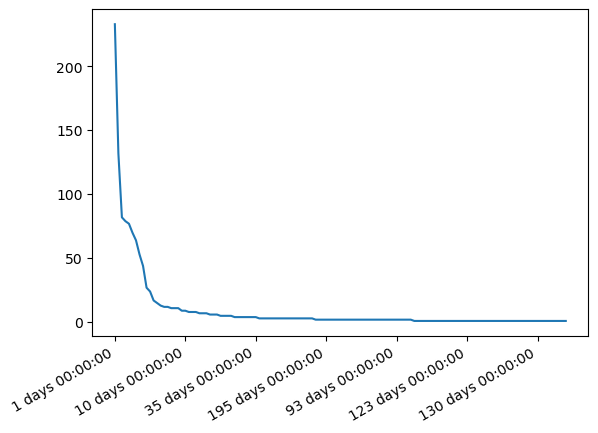

In [26]:
df[~df.days_taken.isna()].days_taken.value_counts(ascending=False).plot()

It seems majority of the users who subscribe to the paid service do so in the first 35 days. Rest are outliers. So, we will be removing the records that took more than 35 days to subscribe to the paid service.

In [27]:
removeDf = df[df.days_taken >= '35 days']
print(df.shape, removeDf.shape, df.shape[0]-removeDf.shape[0])
df = df[~df.student_id.isin(removeDf.student_id)]
df.shape

(34359, 7) (196, 7) 34163


(34163, 7)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34163 entries, 0 to 36135
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   student_id       34163 non-null  int64          
 1   student_country  34151 non-null  object         
 2   date_registered  34163 non-null  datetime64[ns] 
 3   purchase_id      1068 non-null   float64        
 4   purchase_type    1068 non-null   object         
 5   date_purchased   1068 non-null   datetime64[ns] 
 6   days_taken       1068 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2), timedelta64[ns](1)
memory usage: 2.1+ MB


Now we have dataset that is cleaned of duplicate records and is well aligned with our problem statement. Now, we need to add features to this dataframe relating to user engagement between the period from the time the user registered to the time the user purchased the subscription.

course_ratings dataframe provides details about the courses user has rated. The maximum rating that user can rate a course is 5. Also, same student might have enrolled for multiple courses and therefore, might have taken more than one course. Course ratings provide vital information whether the user is liking the platform or not which implies it plays an important role in determining how likely the user is to buy the subscription. We will therefore use course ratings and the number of courses that user has rated as features. One feature will be the number of courses the user has rated before purchasing the subscription and another feature would be average rating given by the user. 

For example, if the user has taken 2 courses before buying subscription and rated those courses as '5 star' and '3 star' respectively, our average rating will be sum_of_the_rating_of_all_courses / num_of_courses_rated i.e. (5+3)/2 = 4

In [29]:
# convert date_rated column from string object datatype to datetime datatype
course_ratings.date_rated = pd.to_datetime(course_ratings.date_rated)

# creating a temporary dataframe for separating student_id and date_purchased columns from our main dataframe
tempDf = df[['student_id', 'date_purchased']]
course_ratings_1 = course_ratings.merge(tempDf, on='student_id', how='left')

# filtering for only those courses that were rated prior to buying the subscription
course_ratings_2 = course_ratings_1[course_ratings_1.date_rated <= course_ratings_1.date_purchased ]

# finding the number of courses rated by student/user before buying the subscription
student_num_courses_rated = course_ratings_2.groupby('student_id').course_id.count().to_dict()

# finding the sum of ratings given by the student/user before buying the subscription
student_sum_course_rating = course_ratings_2.groupby('student_id').course_rating.sum().to_dict()

# finding the average rating given by the student/user before buying the subscription
student_avg_course_rating ={key:student_sum_course_rating[key]/value for key,value in student_num_courses_rated.items()}

Now that we have the number of courses rated by user and the average rating given by student/user, we can add this as one of the features for our dataset. However, these features are for only those users who we know ended up buying subscription, but there will also be users who had rated course but didn't buy the subscripton. So, we need to take those students too into consideration. As for those students, we will take the number of courses they rated in the first 35 days. 

In [30]:
# separating student_id, date_purchased and date_registered
tempDf1 = df[['student_id', 'date_purchased', 'date_registered']]

# filtering for those students that didn't buy subscription
students_not_subscribed = tempDf1[tempDf1.date_purchased.isna()].student_id

# combining the course ratings dataframe with that of student details dataframe
students_not_subscribed_1 = course_ratings[course_ratings['student_id'].isin(students_not_subscribed)].merge(tempDf1, on='student_id', how='left')

# converting 35 days into datetime object
no_of_days = timedelta(days=35)

# selecting records where the user rated the courses before 35 days but didn't subscirbed to paid version
course_ratings_3 = students_not_subscribed_1[ students_not_subscribed_1.date_rated < (students_not_subscribed_1.date_registered + no_of_days) ]

# finding the number of courses students rated 
num_rated_courses = course_ratings_3.groupby('student_id').course_id.count().to_dict()

# finding the sum of ratings given by students to all courses
sum_rated_courses = course_ratings_3.groupby('student_id').course_rating.sum().to_dict()

# finding the average rating given by the student/user before buying the subscription
avg_course_rating ={key:sum_rated_courses[key]/value for key,value in num_rated_courses.items()}

Now, that we have the total number of courses rated by both users who subscribed and those who didn't subscribe in the first 35 days of registering. Now, we will add those two features i.e. count of courses rated and the average rating given by user to our main dataframe 

In [31]:
# combining the course rating details of both type of users - paid and unpaid
student_num_courses_rated.update(num_rated_courses)
student_avg_course_rating.update(avg_course_rating)

# creating temporary dataframe to combine the data
tempDf2 = pd.DataFrame( {'student_id': list(student_num_courses_rated.keys()), 'num_rated_courses':list(student_num_courses_rated.values()) })
tempDf3 = pd.DataFrame( {'student_id': list(student_avg_course_rating.keys()), 'avg_rated_courses':list(student_avg_course_rating.values()) })
tempDf4 = tempDf2.merge(tempDf3, on='student_id', how='outer')
df = df.merge(tempDf4, on='student_id', how='left')

The amount of time spent by user watching tutorials on platform is one of the factors that contributes towards the decision of whether the user will buy subscription or not. 'student_learning' dataframe gives details about the course and the minutes student watched the course for. The student might have enrolled for several courses and therefore, we will consider two features here. One would be the number of minutes user watched the videos and other would be average number of minutes user watched the course videos as the user might have watched several videos of one course but didn't watch much for other and so on. 

Here too, in order to prevent data leakage, we will consider the content watched by student before he bought the subscription. And for those students who didn't buy the course, we will consider the content watched by the user in the first 35 days. 

In [32]:
# tempDf1 = df[['student_id', 'date_purchased', 'date_registered']]
student_learning_1 = student_learning.merge(tempDf1, on ='student_id', how='left')

# filtering a dataframe where the details of number of minutes student either watched the videos before buying subscription or 
# the number of minutes watched in the first 35 days of registration but didn't buy the subscription
student_learning_2 = student_learning_1[(student_learning_1['date_watched']<=student_learning_1.date_purchased) | ( student_learning_1.date_purchased.isna() & (student_learning_1.date_watched < (student_learning_1.date_registered+no_of_days))) ]

# computing the total time spent by student watching videos on the platform
total_time_watched = student_learning_2.groupby('student_id').minutes_watched.sum().to_dict()

# average time spent by the user watching videos of each course he/she enrolled for
avg_course_watched = student_learning_2.groupby('student_id').minutes_watched.sum()/student_learning_2.groupby('student_id').course_id.count()
avg_course_watched = avg_course_watched.to_dict()

# combinging all the dataframes to add 'avg_course_watched' and 'total_time_watched' features to dataframe
tempDf5 = pd.DataFrame({ 'student_id': list(avg_course_watched.keys()), 'avg_course_watched': list(avg_course_watched.values()) })
tempDf6 = pd.DataFrame({ 'student_id': list(total_time_watched.keys()),'total_time_watched':list(total_time_watched.values()) })
tempDf7 = tempDf5.merge(tempDf6, on='student_id', how='outer')
df = df.merge(tempDf7, on='student_id', how='left')

student_engagement dataframe provides details about the number of quizzes, assignments and lessons the student took, which can be used as features for our usecase.

In [33]:
tempDf8 = student_engagement.merge(tempDf1, on='student_id', how='left')
tempDf8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65371 entries, 0 to 65370
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   engagement_id       65371 non-null  int64         
 1   student_id          65371 non-null  int64         
 2   engagement_quizzes  65371 non-null  int64         
 3   engagement_exams    65371 non-null  int64         
 4   engagement_lessons  65371 non-null  int64         
 5   date_engaged        65371 non-null  object        
 6   date_purchased      22194 non-null  datetime64[ns]
 7   date_registered     49852 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 4.5+ MB


It seems there are some students whose registration date is unknown, we will be dropping such students from our dataset as registration date is vital to our use case.

In [34]:
# removing those records where the date_registered is null
tempDf8 = tempDf8[~tempDf8.date_registered.isna()]

# filtering those records where date engaged is less than date pruchased  and for those with null value for date puchased
# we are considering the interactions in first 35 days.
tempDf9 = tempDf8[ (tempDf8.date_engaged <= tempDf8.date_purchased) | (tempDf8.date_purchased.isna() & ((tempDf8.date_registered + no_of_days)>tempDf8.date_engaged))]

# creating features 'engagement_quizzes', 'engaegment_exams', 'engagement_lessons' 
tempDf10 = tempDf9.groupby('student_id')[['engagement_quizzes', 'engagement_exams', 'engagement_lessons']].sum().reset_index()

# merged the new features with original dataframe
df = df.merge(tempDf10, on='student_id', how='left')

how well students perform in exams can be one of the motivating factors for students to determine whether they wish to proceed to buy the course of not. student_exams dataframe provides details about the exams students have taken and their correspondign scores. As the students took multiple exams, we will have to create a feature where we can use one value that represents all the exams and the score the student have achieved in them. So, we will take average score of student in the exams as one of the feature.

In [35]:
tempDf11 = student_exams.merge(tempDf1, on='student_id', how='left')

tempDf11 = tempDf11[~tempDf11.date_registered.isna()]

tempDf12 = tempDf11[ (tempDf11.date_exam_completed <= tempDf11.date_purchased) | (tempDf11.date_purchased.isna() & (tempDf11.date_exam_completed < (tempDf11.date_registered+no_of_days) ))]

tempDf13 = pd.DataFrame(tempDf12.groupby('student_id')['exam_result'].sum() / tempDf12.groupby('student_id')['exam_id'].count()).reset_index().rename(columns={'student_id':'student_id',0:'avg_exam_score'})

df = df.merge(tempDf13, on='student_id', how='left')

In the student_quizzes table we do have information about the different quizzes the student has attempted along with the question and answer_id. In the quiz_info dataframe, we do have question_id and corresponding answer_id along with the result i.e. whether the answer given by user is correct or not. However, we do not have the temporal details i.e. when the user took the test, therefore we cannot use this data as we have restricted our use case to data of only first 35 days or upto user buying paid subscription

In [36]:
tempDf14 = student_hub_questions.merge(tempDf1, on='student_id', how='left')

tempDf14 = tempDf14[~tempDf14.date_registered.isna()]

tempDf15 = tempDf14[ (tempDf14.date_question_asked<tempDf14.date_purchased) | (tempDf14.date_purchased.isna() &(tempDf14.date_question_asked< (tempDf14.date_registered+no_of_days)))]

tempDf16 = pd.DataFrame(tempDf15.groupby('student_id').hub_question_id.count()).reset_index().rename(columns={'student_id':'student_id', 'hub_question_id':'no_of_questions'})

df = df.merge(tempDf16, on='student_id', how='left')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34163 entries, 0 to 34162
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   student_id          34163 non-null  int64          
 1   student_country     34151 non-null  object         
 2   date_registered     34163 non-null  datetime64[ns] 
 3   purchase_id         1068 non-null   float64        
 4   purchase_type       1068 non-null   object         
 5   date_purchased      1068 non-null   datetime64[ns] 
 6   days_taken          1068 non-null   timedelta64[ns]
 7   num_rated_courses   647 non-null    float64        
 8   avg_rated_courses   647 non-null    float64        
 9   avg_course_watched  16671 non-null  float64        
 10  total_time_watched  16671 non-null  float64        
 11  engagement_quizzes  16846 non-null  float64        
 12  engagement_exams    16846 non-null  float64        
 13  engagement_lessons  16846 non-n

This is our final cleaned dataset that we will be using further for our usecase.

In [46]:
df.to_csv('cleaned_dataframe.csv',index=None)